# Problem Statement:

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Target Colummn: Sales

In [6]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

### Converting Numerical Feature into Categorical 

In [7]:
def Tagging(sale):
    if sale>= 7.5:
        return "High"
    else:
        return "Low"

In [8]:
df['Sales']=df['Sales'].apply(Tagging)

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


### Checking for NAN and Duplicated Values

In [10]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Encoding

In [12]:
Objectcol=df.select_dtypes(object).columns
Objectcol

Index(['Sales', 'ShelveLoc', 'Urban', 'US'], dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


[]

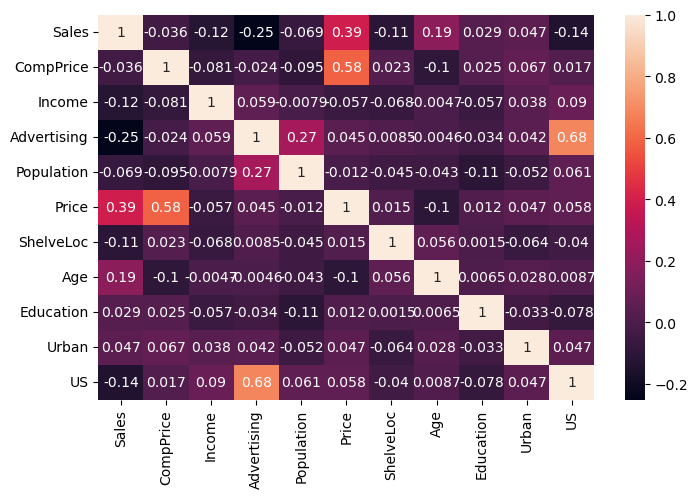

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.plot()

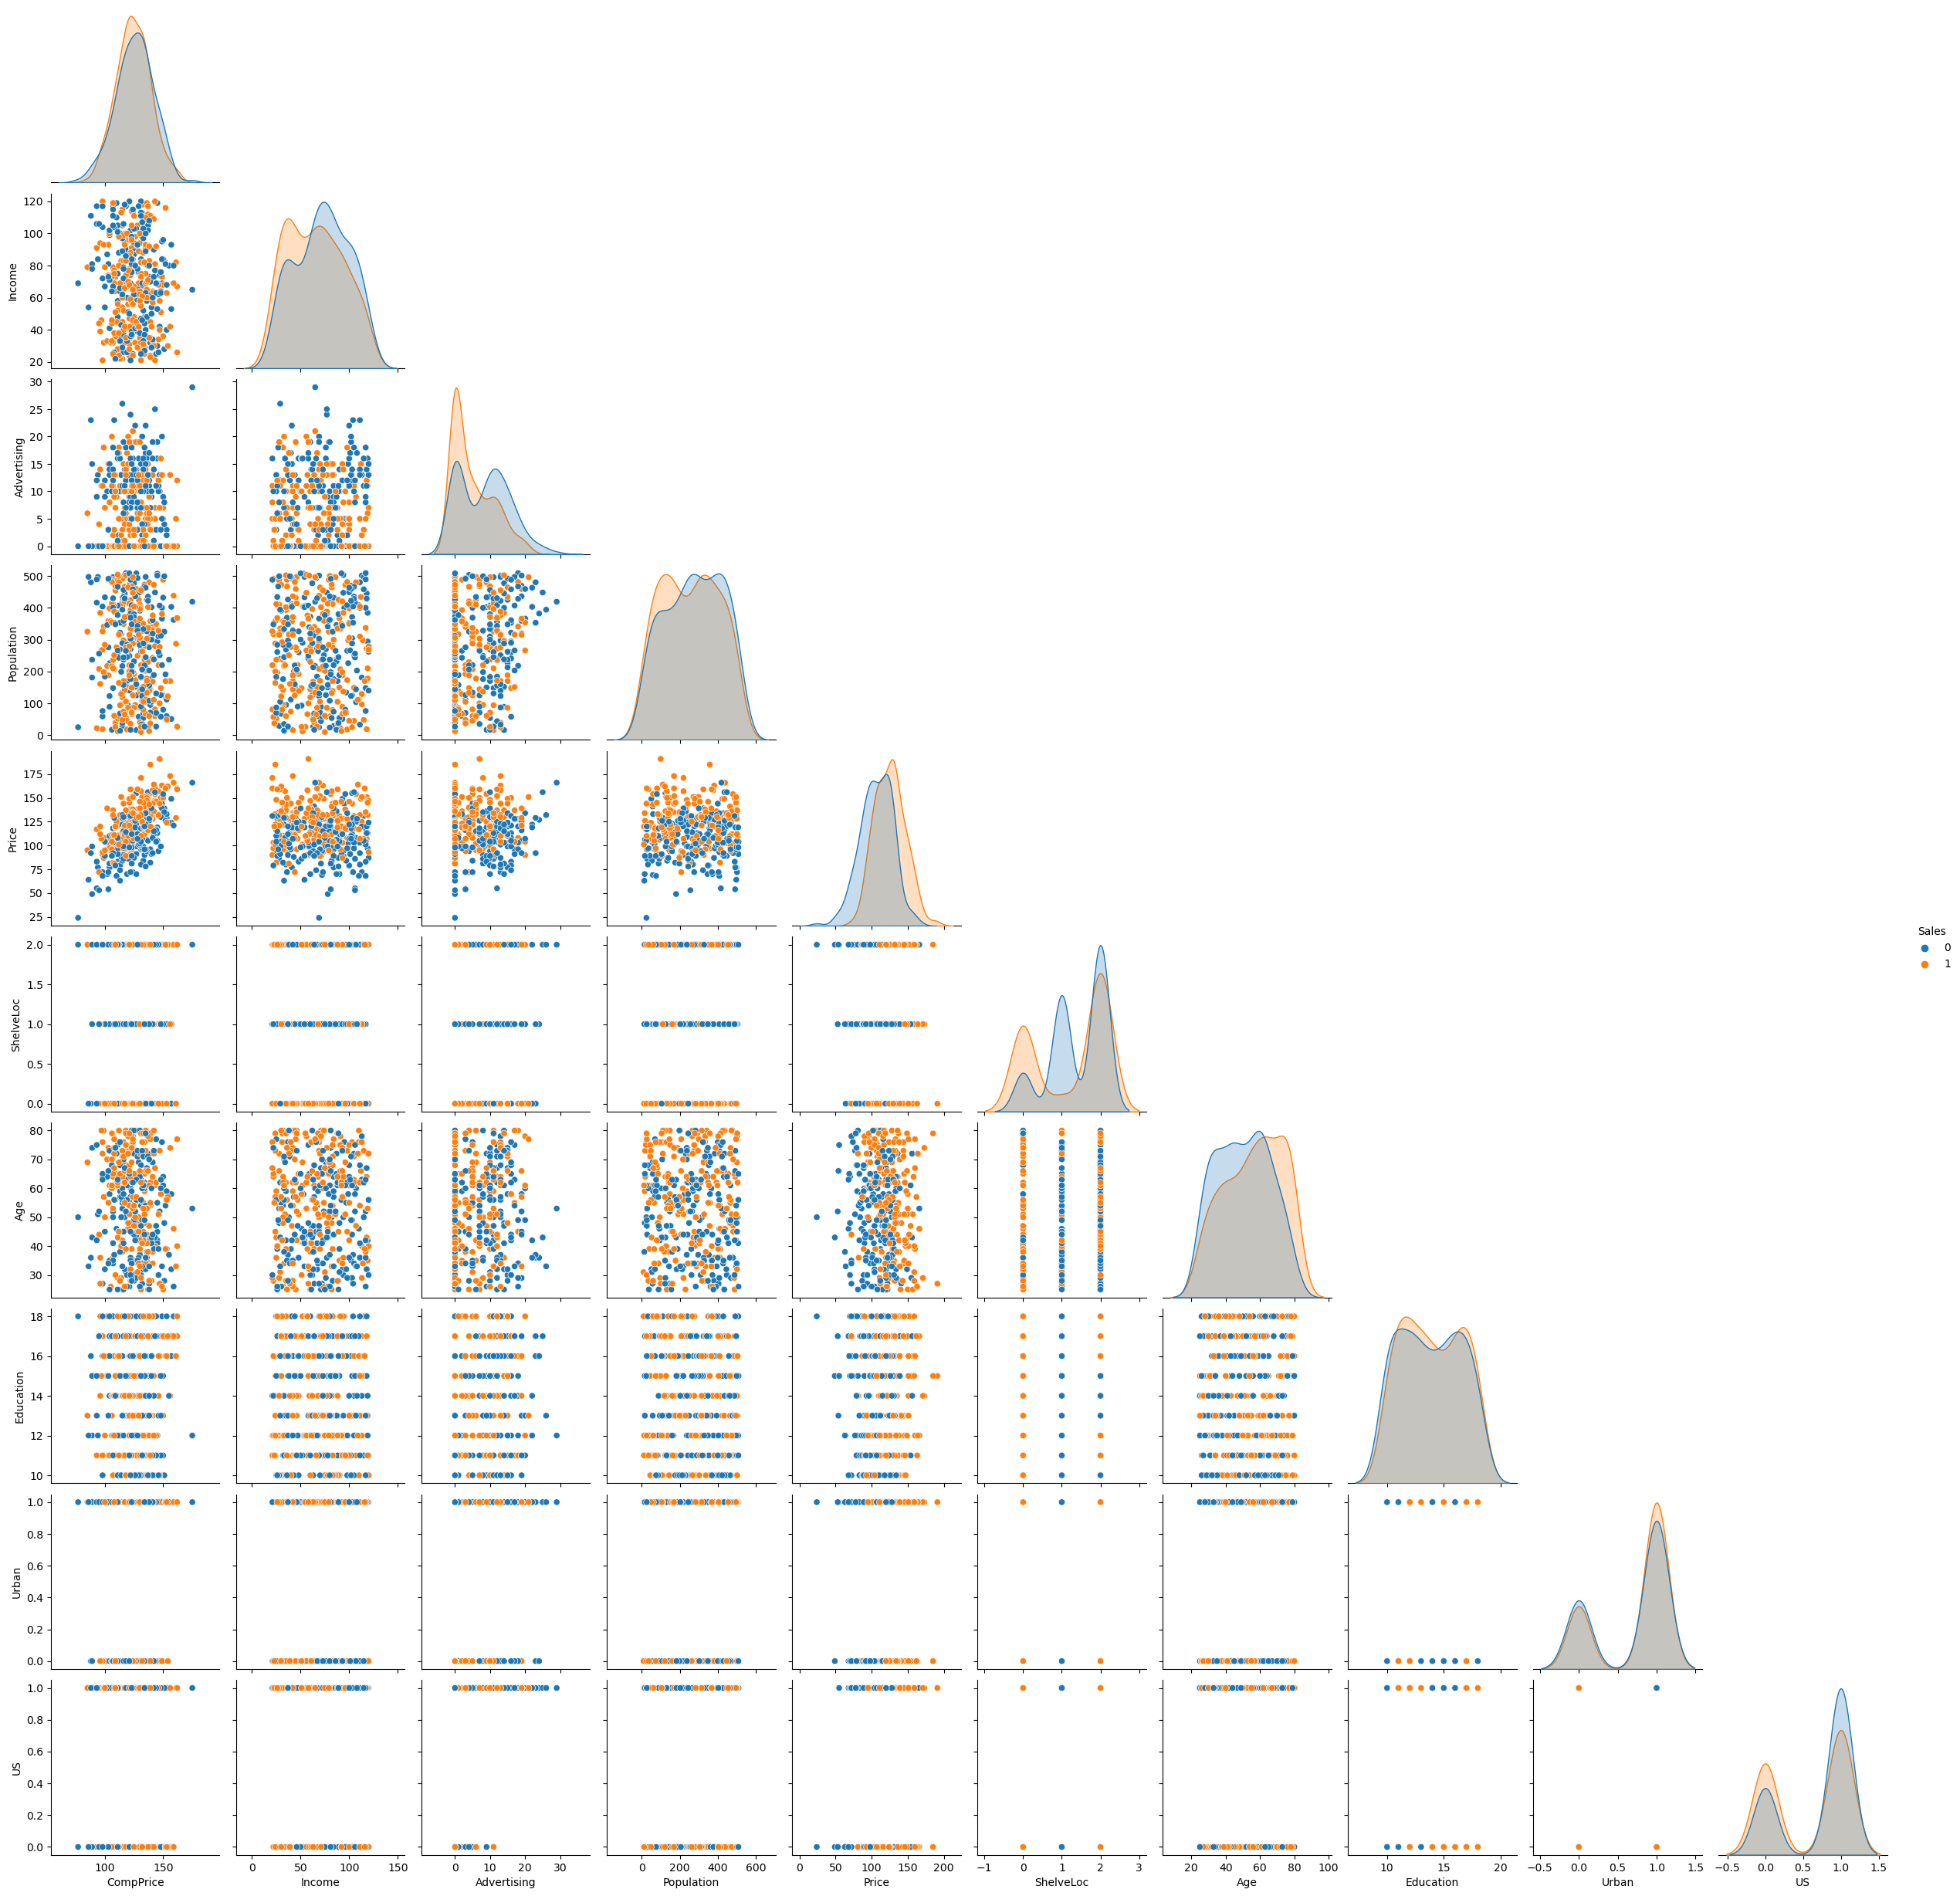

In [16]:
sns.pairplot(df,hue='Sales',corner=True)

### Feature Selection

In [17]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

### Evaluation

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,make_scorer

<Axes: >

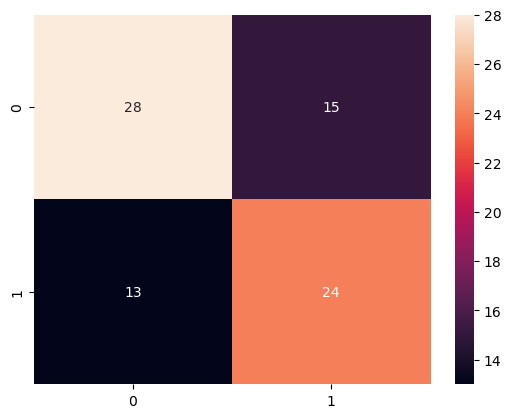

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        43
           1       0.62      0.65      0.63        37

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80



In [27]:
from sklearn.tree import plot_tree

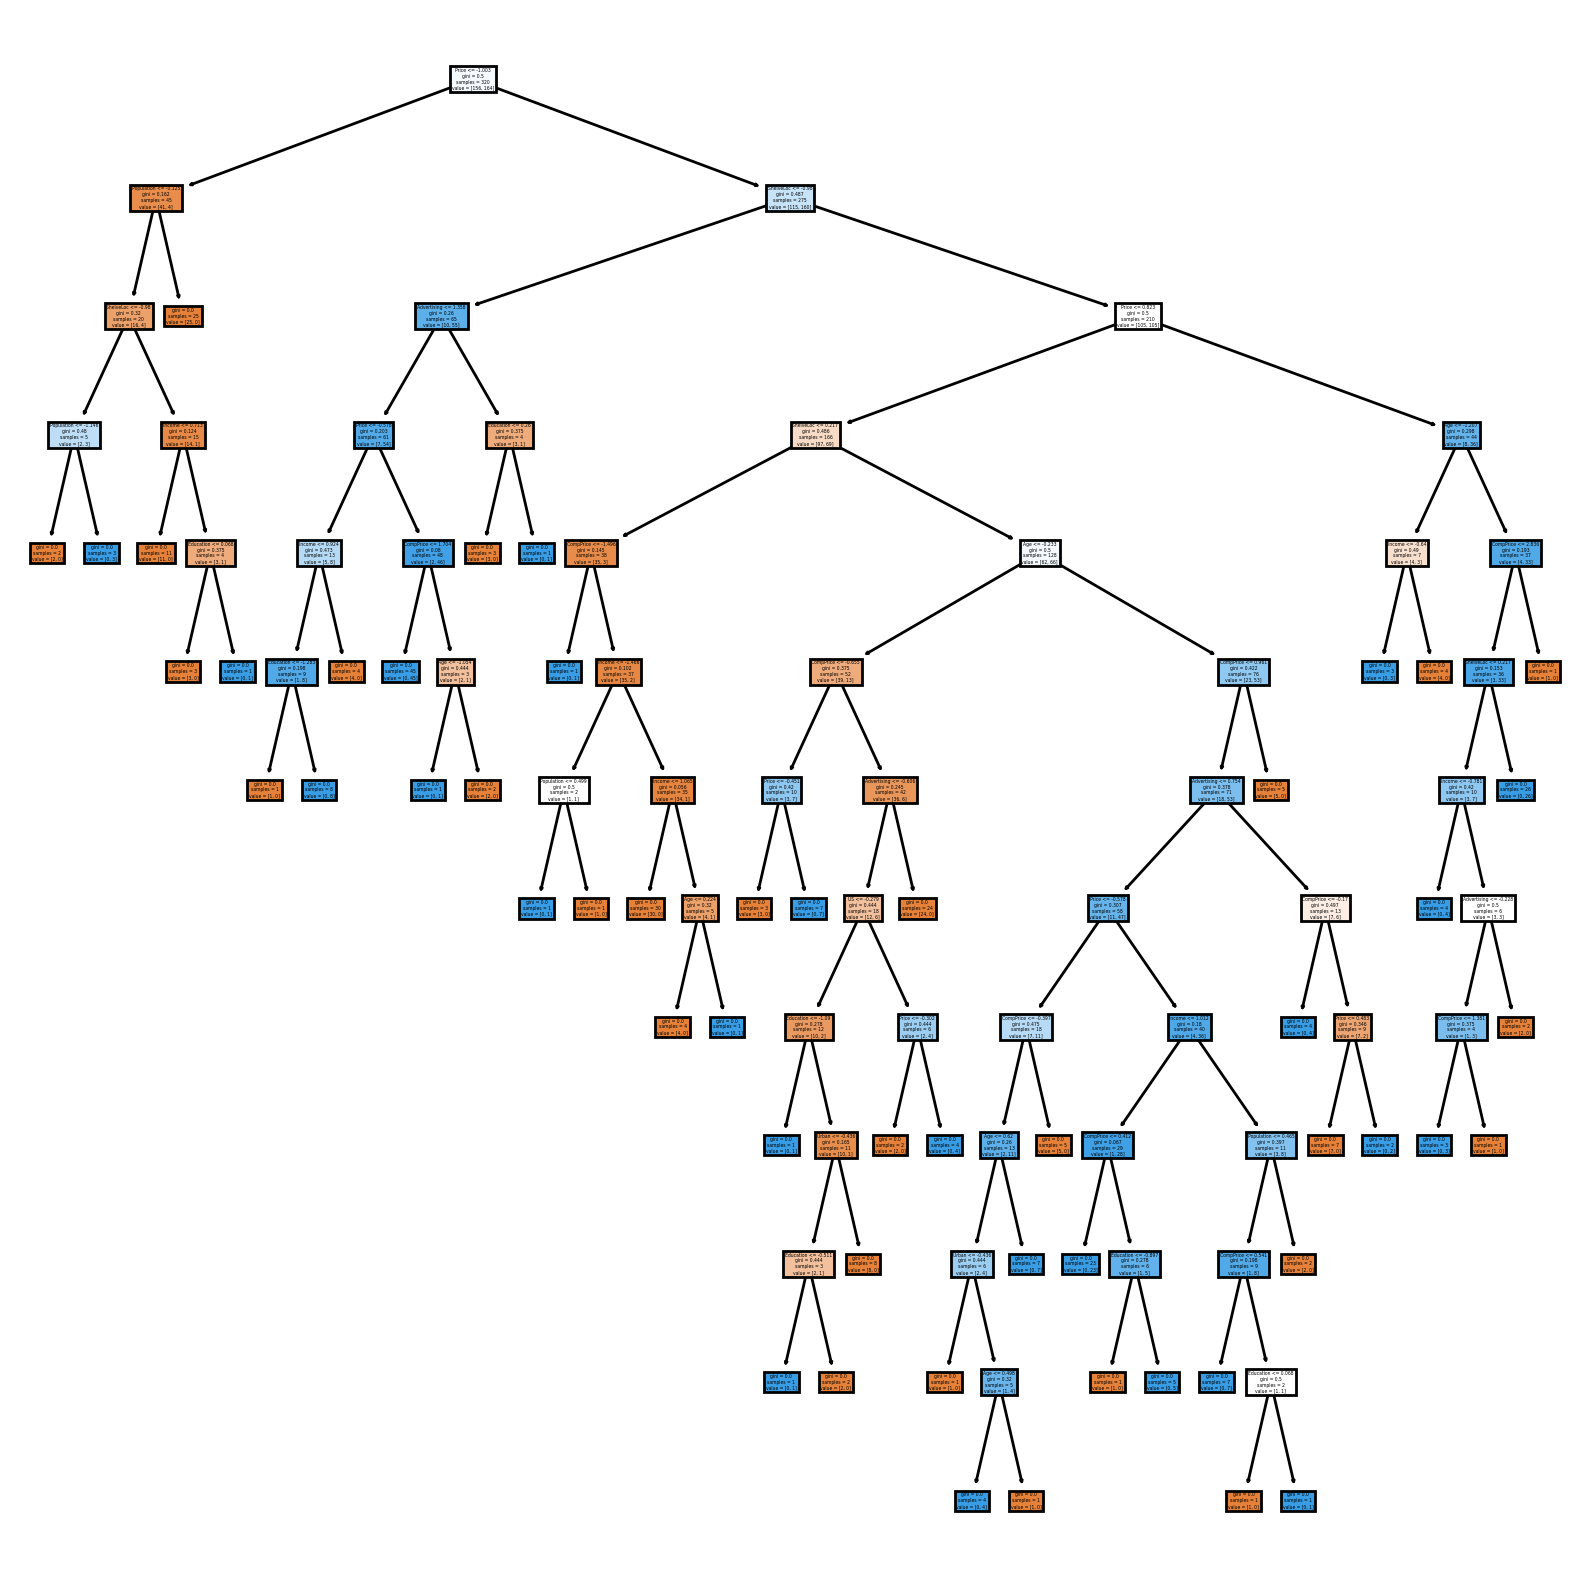

In [28]:
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model,filled=True,feature_names=x.columns);

## Hyper Parameter Tunning

In [29]:
def report_model(model):
    model_preds = model.predict(X_test)
    train_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    
    print(f"train:-{train_Score}\ntest:- {test_Score}")
    print()
    print(sns.heatmap(confusion_matrix(y_test,model_preds),annot=True))
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns);

In [30]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

- The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

- max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

train:-0.84375
test:- 0.7125

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        43
           1       0.68      0.73      0.70        37

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80





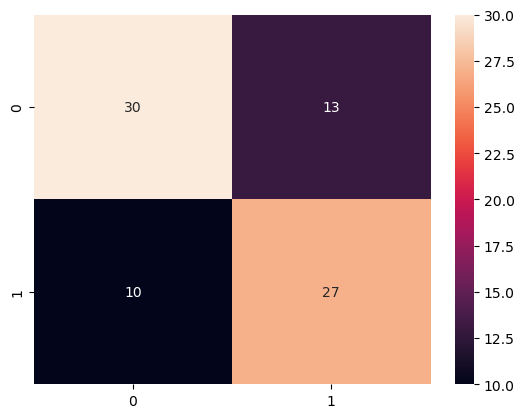

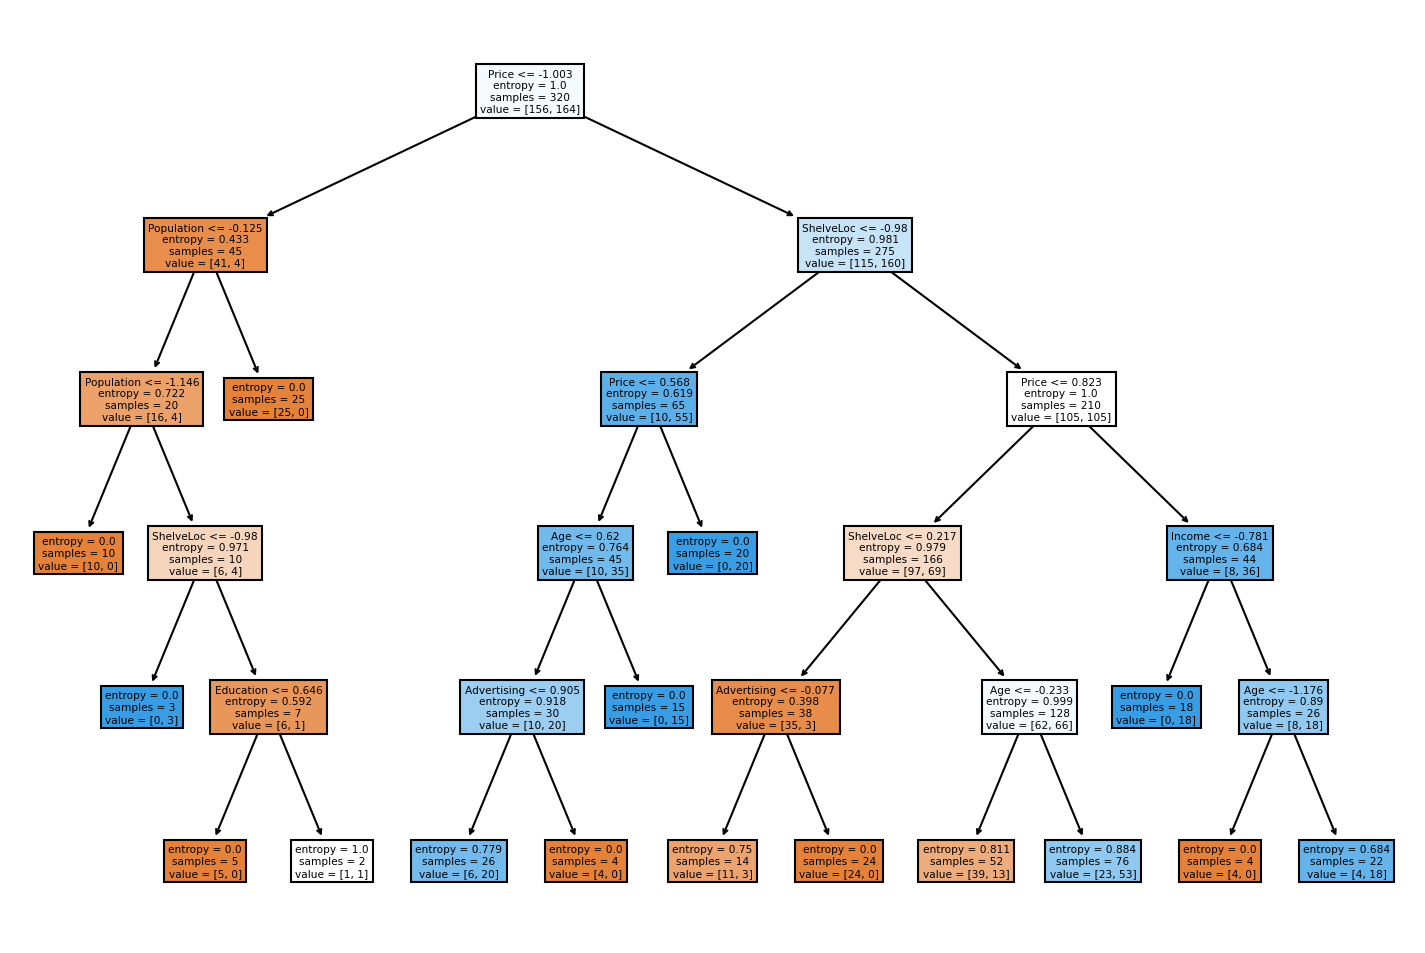

In [31]:
pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

train:-0.84375
test:- 0.7125

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        43
           1       0.68      0.73      0.70        37

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80





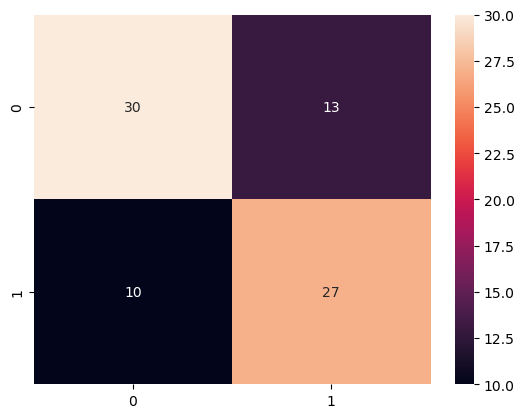

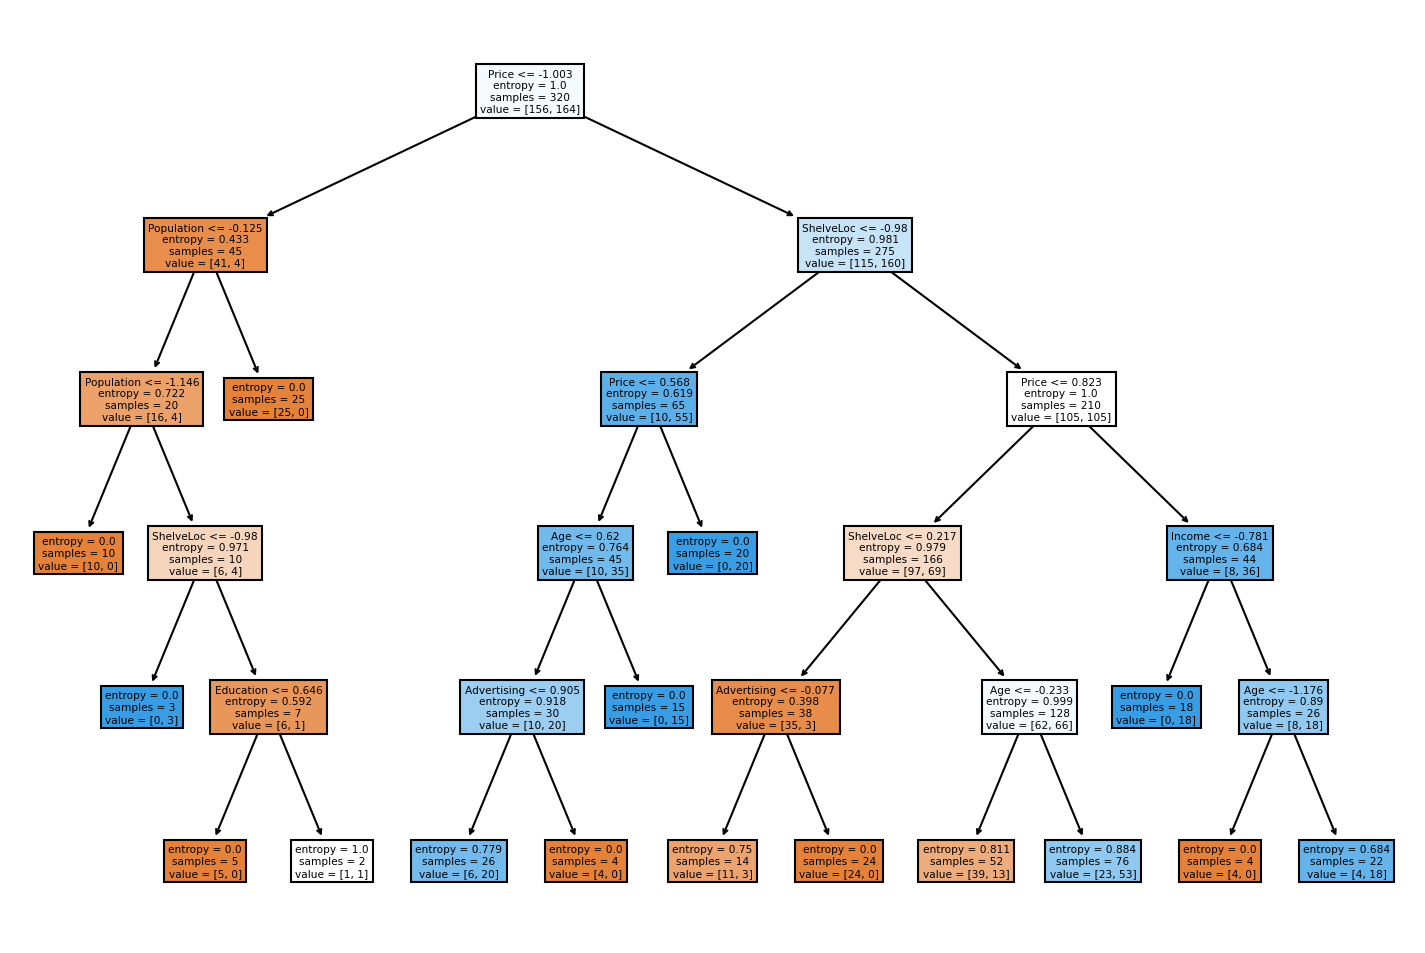

In [32]:
report_model(pruned_tree)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}


grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=10,n_jobs=-1,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [36]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=5)

train:-0.94375
test:- 0.725

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.70      0.70      0.70        37

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80





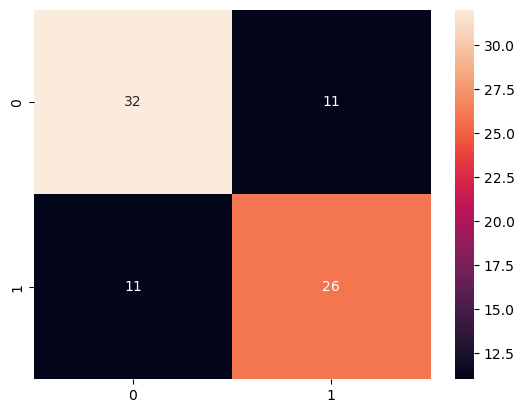

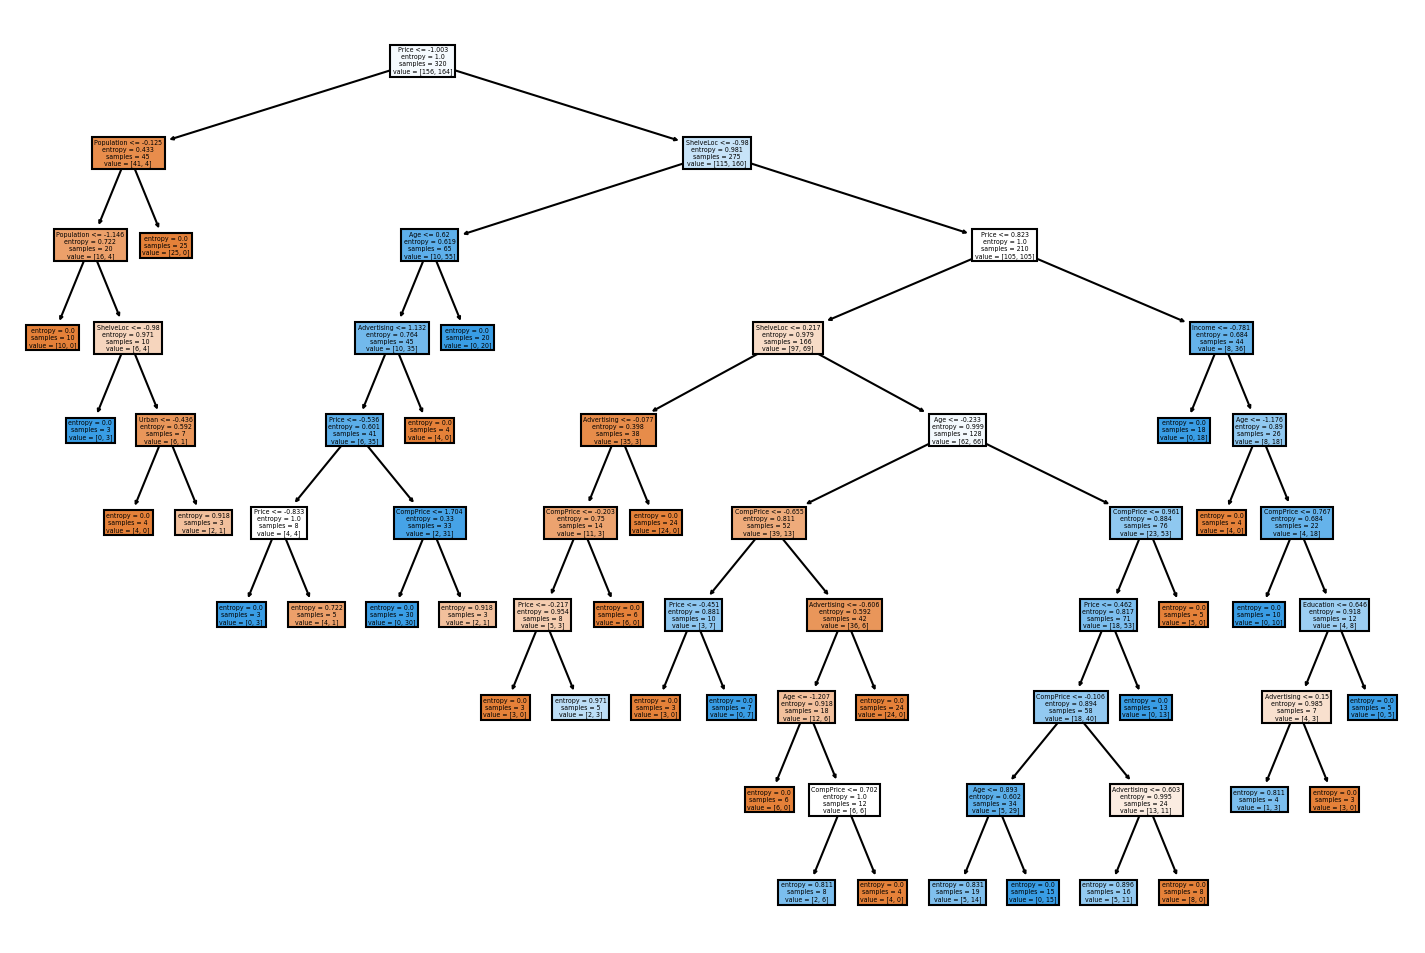

In [37]:
report_model(grid.best_estimator_)

In [38]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_leaf_nodes': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5]}


grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=5,n_jobs=-1,verbose=3)

In [39]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [40]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

train:-0.846875
test:- 0.75

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80





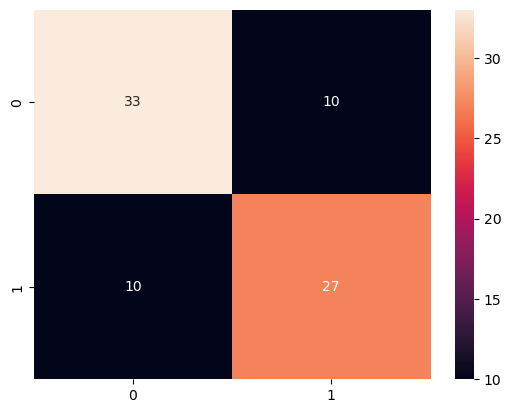

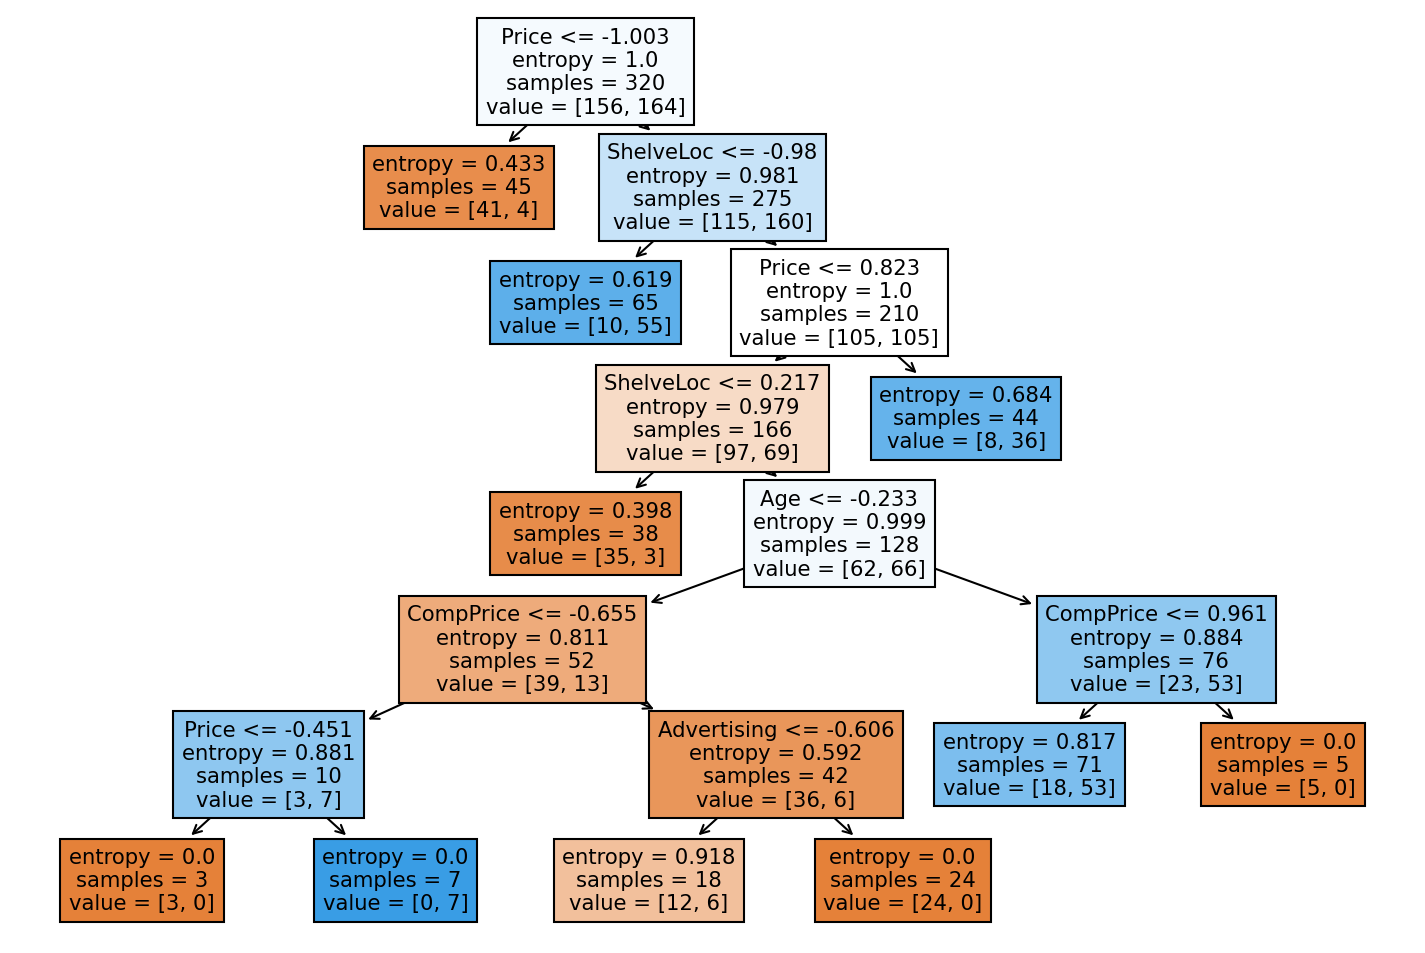

In [41]:
report_model(grid.best_estimator_)